In [2]:
from utils.files import mx_my_masses

In [3]:
MX = np.unique(np.array(mx_my_masses)[:,0])

In [4]:
eff = {int(mx):{} for mx in MX}
for mx,my in mx_my_masses:
    tree = SixB(get_NMSSM(mx,my))
    e = ak.sum(tree.n_H_paired_correct[tree.resolved_mask] == 3) / ak.sum(tree.resolved_mask)
    eff[int(mx)][int(my)] = round(e,3)

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /

In [5]:
from pandas import DataFrame
import seaborn as sns

In [6]:
df = DataFrame.from_dict(eff)
df = df.reindex(index=df.index[::-1])
df

,400,450,500,550,600,650,700,750,800,850,900,950,1000,1100,1200
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660,0.719
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583,0.673,0.750,0.747
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552,0.653,0.717,0.754,0.771,0.752
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.489,0.616,0.690,0.730,0.756,0.773,0.776,0.751
500,NaN,NaN,NaN,NaN,NaN,0.399,0.540,0.625,0.687,0.723,0.756,0.773,0.778,0.777,0.746
450,NaN,NaN,NaN,NaN,0.343,0.479,0.577,0.647,0.699,0.732,0.751,0.760,0.771,0.763,0.725
400,NaN,NaN,NaN,0.285,0.398,0.117,0.578,0.641,0.677,0.698,0.720,0.728,0.732,0.712,0.671
350,NaN,NaN,0.213,0.281,0.376,0.451,0.523,0.563,0.595,0.610,0.618,0.627,0.614,0.592,0.557
300,NaN,0.143,0.177,0.257,0.346,0.410,0.460,0.502,0.528,0.534,0.546,0.547,0.538,0.514,0.466


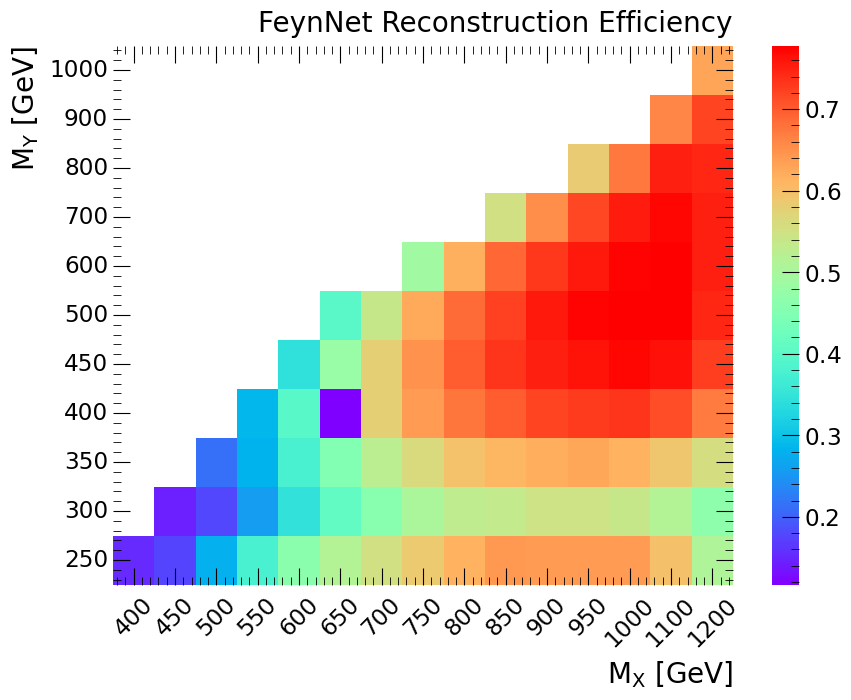

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df, cmap='rainbow', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_ylabel(r"$M_Y$ [GeV]")
ax.set_title("FeynNet Reconstruction Efficiency")
fig.savefig('plots/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/efficiency.pdf', bbox_inches='tight')